# Dependencies

In [19]:
import numpy as np
import scipy as sp
import seaborn as sn
import pandas as pd
import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.animation
import time
from IPython.display import HTML, Image, Video
from tqdm import tqdm
import os
import xarray as xr
import gc
import multiprocessing

from mystatsfunctions import OLSE,LMoments
from moarpalettes import get_palette

## Matplotlib rcparams setup:
plt.style.use('/home/leachl/Documents/Thesis/ancil/figure-style.mplstyle')
## textwidth of Thesis
textwidth = 5.848611111111111

%matplotlib inline

# Import data

In [20]:
eea_meta_df = pd.read_csv('./DATA Carbon Brief Attribution Database 2021 update - Summary_2021.csv',skiprows=9,usecols=np.arange(11)).dropna(how='all')

In [22]:
eea_meta_df.head()

,Name,Event year/Trend,WMO region,Location,Event type,Classification,Summary statement,Citation,Publication year,Source,Link
0,"European summer heatwave, 2003",2003,Europe,Continental Europe,Heat,More severe or more likely to occur,"""We estimate it is very likely (confidence lev...","Stott, P. et al., 2004: Human contribution to ...",2004.0,Nature,https://www.nature.com/nature/journal/v432/n70...
1,"Global temperature extremes, since 1950",Trend,Global,NaN,Heat,More severe or more likely to occur,"""Comparing these observations with climate mod...","Christidis, N. et al., 2005: Detection of chan...",2005.0,Geophysical Research Letters,https://agupubs.onlinelibrary.wiley.com/doi/fu...
2,"Record warm autumn in Europe, 2006",2006,Europe,North side of the Alps to southern Norway,Heat,More severe or more likely to occur,"""Global warming has made a warm autumn like th...","Van Oldenborgh, G-J. et al., 2007: How unusual...",2007.0,Climate of the Past,http://www.clim-past.net/3/659/2007/cp-3-659-2...
3,"Increasing frequency of ""very warm"" northern h...",Trend,Northern Hemisphere,NaN,Heat,More severe or more likely to occur,"""We detect the dominant influence of anthropog...","Jones, G. et al., 2007: Human contribution to ...",2007.0,Journal of Geophysical Research: Atmospheres,https://agupubs.onlinelibrary.wiley.com/doi/fu...
4,"Moscow summer heatwave, 2010",2010,Asia,Moscow,Heat,More severe or more likely to occur,"""For July temperature in Moscow, we estimate.....","Rahmstorf, S. & Coumou, D. 2011: Increase of e...",2011.0,Proceedings of the National Academy of Sciences,http://www.pnas.org/content/108/44/17905.abstract


# Generate plot

In [64]:
## create palette
palette = get_palette.color_blind().to_sn_palette()
palette = [palette[x] for x in [1,3,2,0]]

/home/leachl/miniconda3/lib/python3.7/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


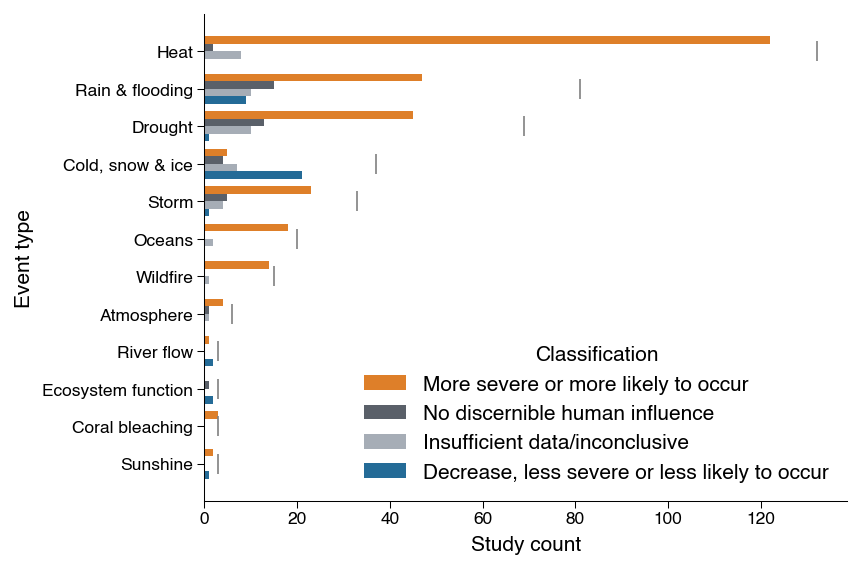

In [68]:
fig = plt.figure()

sn.countplot(data=eea_meta_df,y='Event type',hue='Classification',order=eea_meta_df['Event type'].value_counts().index,palette=palette)

sn.scatterplot(data=eea_meta_df.groupby('Event type').count().reset_index().sort_values('Name',ascending=False),y='Event type',x='Name',color='grey',marker='|',s=100)

## axis layout
plt.legend(loc=4,title='Classification')
sn.despine()
plt.xlabel('Study count')

## figure layout
fig.dpi=150
fig_aspect = 2/3
fig.set_size_inches(textwidth,textwidth*fig_aspect)
fig.patch.set_facecolor('xkcd:white')
plt.tight_layout()